In [ ]:
pwd

'C:\\Users\\Luqna Aziziyah\\Documents\\luqna\\kuliah\\sems 4\\data mining I'

# 1. collecting data

 pada code berikut berisi memanggil data csv yang berisi pencemaran udata kota jakarta pada bulan januari-juli

In [ ]:
import pandas as pd

df = pd.read_csv('pencemaran udara jkt.csv')
df

tanggal                           stasiun pm10 so2  co  o3 no2   max  \
0    2020-01-01                DKI1 (Bunderan HI)   30  20  10  32   9  32.0   
1    2020-01-02                DKI1 (Bunderan HI)   27  22  12  29   8  29.0   
2    2020-01-03                DKI1 (Bunderan HI)   39  22  14  32  10  39.0   
3    2020-01-04                DKI1 (Bunderan HI)   34  22  14  38  10  38.0   
4    2020-01-05                DKI1 (Bunderan HI)   35  22  12  31   9  35.0   
..          ...                               ...  ...  ..  ..  ..  ..   ...   
905  2020-06-26  DKI5 (Kebon Jeruk) Jakarta Barat   71  14  23  97  13  97.0   
906  2020-06-27  DKI5 (Kebon Jeruk) Jakarta Barat   55  14  11  64   7  64.0   
907  2020-06-28  DKI5 (Kebon Jeruk) Jakarta Barat   58  16  10  71   7  71.0   
908  2020-06-29  DKI5 (Kebon Jeruk) Jakarta Barat   56  15  10  90  11  90.0   
909  2020-06-30  DKI5 (Kebon Jeruk) Jakarta Barat   67  15  16  86  10  86.0   

    critical categori  
0         O3     BAIK  
1         O3     BAIK  
2       PM10     BAIK  
3         O3     BAIK  
4       PM10     BAIK  
..       ...      ...  
905       O3   SEDANG  
906       O3   SEDANG  
907       O3   SEDANG  
908       O3   SEDANG  
909       O3   SEDANG  

[910 rows x 10 columns]

code dibawah ini berguna untuk memunculkan data hanya pada stasiun kebon jeruk jakarta

In [ ]:
# Mengambil subset data dengan stasiun DKI5
import numpy as np

df = df[df['stasiun'] == 'DKI5 (Kebon Jeruk) Jakarta Barat']
df = df.replace('---', np.nan)

# Menampilkan subset data
df

tanggal                           stasiun pm10 so2  co   o3  no2  \
124  2020-01-01  DKI5 (Kebon Jeruk) Jakarta Barat   35  13  18   46  NaN   
125  2020-01-02  DKI5 (Kebon Jeruk) Jakarta Barat   22  15  24  102    7   
126  2020-01-03  DKI5 (Kebon Jeruk) Jakarta Barat   44  17  21   63    7   
127  2020-01-04  DKI5 (Kebon Jeruk) Jakarta Barat   40  18  19   85    9   
128  2020-01-05  DKI5 (Kebon Jeruk) Jakarta Barat   37  21  18   62    5   
..          ...                               ...  ...  ..  ..  ...  ...   
905  2020-06-26  DKI5 (Kebon Jeruk) Jakarta Barat   71  14  23   97   13   
906  2020-06-27  DKI5 (Kebon Jeruk) Jakarta Barat   55  14  11   64    7   
907  2020-06-28  DKI5 (Kebon Jeruk) Jakarta Barat   58  16  10   71    7   
908  2020-06-29  DKI5 (Kebon Jeruk) Jakarta Barat   56  15  10   90   11   
909  2020-06-30  DKI5 (Kebon Jeruk) Jakarta Barat   67  15  16   86   10   

       max critical     categori  
124   46.0       O3         BAIK  
125  102.0       O3  TIDAK SEHAT  
126   63.0       O3       SEDANG  
127   85.0       O3       SEDANG  
128   62.0       O3       SEDANG  
..     ...      ...          ...  
905   97.0       O3       SEDANG  
906   64.0       O3       SEDANG  
907   71.0       O3       SEDANG  
908   90.0       O3       SEDANG  
909   86.0       O3       SEDANG  

[151 rows x 10 columns]

 untuk melihat jenis data apa saja pada tiap kolomnya

In [ ]:
df.dtypes

tanggal      object
stasiun      object
pm10         object
so2          object
co           object
o3           object
no2          object
max         float64
critical     object
categori     object
dtype: object

untuk mengetahui kolom apa saja yg terdapat pada dataste

In [ ]:
df.columns

Index(['tanggal', 'stasiun', 'pm10', 'so2', 'co', 'o3', 'no2', 'max',
       'critical', 'categori'],
      dtype='object')

## menghapus kolom yang tidak diperlukan

disini kita menghapus kolom, stasiun, tanggal, max, dan critical

In [ ]:
col = ['tanggal', 'stasiun','max','critical']

df = df.drop(col, axis=1)
df

pm10 so2  co   o3  no2     categori
124   35  13  18   46  NaN         BAIK
125   22  15  24  102    7  TIDAK SEHAT
126   44  17  21   63    7       SEDANG
127   40  18  19   85    9       SEDANG
128   37  21  18   62    5       SEDANG
..   ...  ..  ..  ...  ...          ...
905   71  14  23   97   13       SEDANG
906   55  14  11   64    7       SEDANG
907   58  16  10   71    7       SEDANG
908   56  15  10   90   11       SEDANG
909   67  15  16   86   10       SEDANG

[151 rows x 6 columns]

## mengubah kolom agar numerik semua

melakukan encoding untuk kolom categori agar menjadi numerik semua, dengan 0 berarti baik, 1 tidak sehat, dan 2, sedang

In [ ]:
# Definisi fungsi untuk label encoding
def label_encode(column):
    unique_values = column.unique()
    mapping = {value: index for index, value in enumerate(unique_values)}
    encoded_column = column.map(mapping)
    return encoded_column

# Label encoding pada kolom 'kategori'
df['kategori'] = label_encode(df['categori'])

# Buat DataFrame baru dengan kolom-kolom yang diinginkan
df = df.drop(['categori'], axis=1)

# Cetak DataFrame yang telah diencode
print(df)


    pm10 so2  co   o3  no2  kategori
124   35  13  18   46  NaN         0
125   22  15  24  102    7         1
126   44  17  21   63    7         2
127   40  18  19   85    9         2
128   37  21  18   62    5         2
..   ...  ..  ..  ...  ...       ...
905   71  14  23   97   13         2
906   55  14  11   64    7         2
907   58  16  10   71    7         2
908   56  15  10   90   11         2
909   67  15  16   86   10         2

[151 rows x 6 columns]


# 2. Processing data

melakukan penghapusan data apabila terjadi data duplikat

In [ ]:
import pandas as pd

# Mendeteksi data duplikat
duplikat = df.duplicated()

# Menampilkan jumlah data yang duplikat
print("Jumlah data yang duplikat: ", duplikat.sum())

# Menghapus data duplikat berdasarkan semua kolom
df = df.drop_duplicates()

print("Jumlah data sebelum dihapus: ", len(df)+duplikat.sum())
print("Jumlah data setelah dihapus: ", len(df))

Jumlah data yang duplikat:  0
Jumlah data sebelum dihapus:  151
Jumlah data setelah dihapus:  151


mengubah kolom tersebut menjadi float

In [ ]:
col = ['pm10', 'so2', 'co', 'o3', 'no2']

# Mengubah jenis data objek menjadi float pada kolom tertentu
df[col] = df[col].astype(float)


## melihat korelasi

melihat korelasi

              pm10       so2        co        o3       no2  kategori
pm10      1.000000  0.067537  0.388764  0.090819  0.422337  0.230325
so2       0.067537  1.000000  0.510356 -0.191389 -0.081680 -0.057916
co        0.388764  0.510356  1.000000 -0.070448  0.304582  0.071751
o3        0.090819 -0.191389 -0.070448  1.000000  0.204056  0.056937
no2       0.422337 -0.081680  0.304582  0.204056  1.000000  0.172207
kategori  0.230325 -0.057916  0.071751  0.056937  0.172207  1.000000


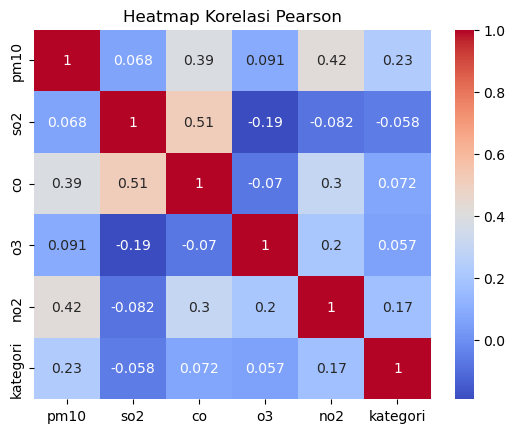

In [ ]:
# melihat korelasi sebelum dianalisis

import matplotlib.pyplot as plt
import seaborn as sns

# melihat korelasi antara variabel pada dataset menggunakan metode Pearson correlation
corr_matrix = df.corr(method='pearson')
print(corr_matrix)

# membuat heatmap korelasi
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Pearson")
plt.show()


In [ ]:
# Menghitung matriks korelasi
correlation_matrix = df.corr()
correlation_matrix

pm10       so2        co        o3       no2  kategori
pm10      1.000000  0.067537  0.388764  0.090819  0.422337  0.230325
so2       0.067537  1.000000  0.510356 -0.191389 -0.081680 -0.057916
co        0.388764  0.510356  1.000000 -0.070448  0.304582  0.071751
o3        0.090819 -0.191389 -0.070448  1.000000  0.204056  0.056937
no2       0.422337 -0.081680  0.304582  0.204056  1.000000  0.172207
kategori  0.230325 -0.057916  0.071751  0.056937  0.172207  1.000000

## mendeteksi missing value

mendeteksi missing value

In [ ]:
df.isna().sum()

pm10         1
so2         15
co           1
o3           0
no2          7
kategori     0
dtype: int64

### menghitung distribusi simetris

menghitung skewness untuk mengetahui cara imputasi missing value

In [ ]:
from scipy.stats import skew

col = ['pm10', 'so2', 'co', 'o3', 'no2']

# Menghitung skewness dari sebuah kolom data
skewness = skew(df[col])

skewness

array([      nan,       nan,       nan, 1.0109045,       nan])

menghitung distribusi simetris guna mengetahui cara imputasi miss value

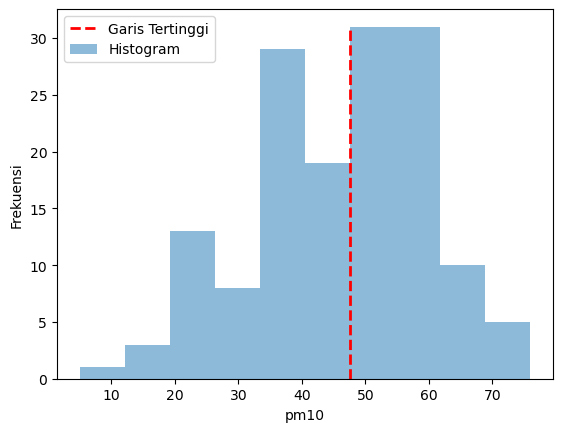

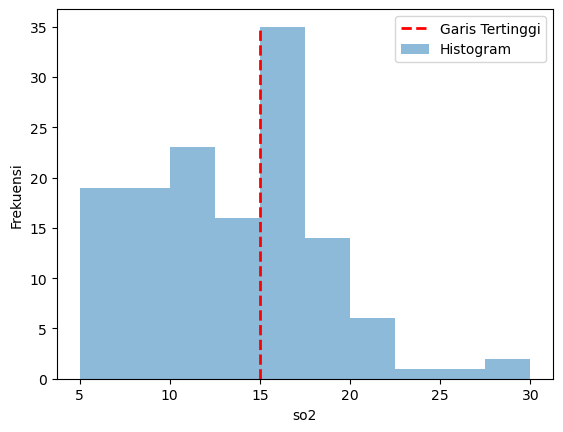

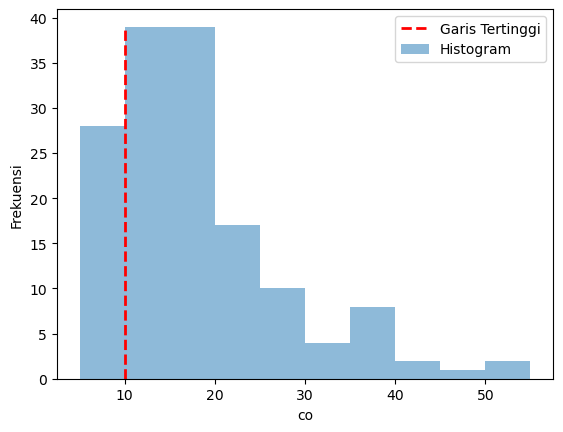

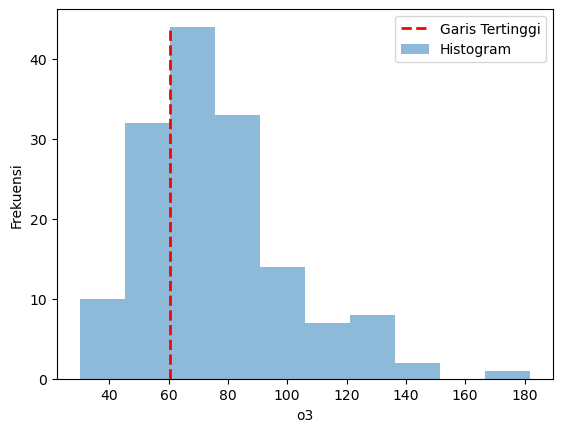

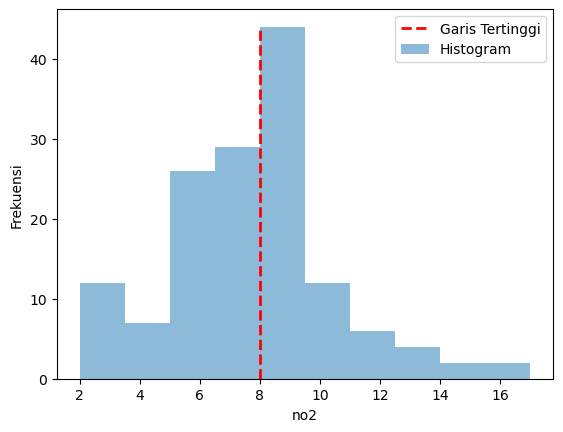

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

col = ['pm10', 'so2', 'co', 'o3', 'no2']

for column in col:
    values, bins, _ = plt.hist(df[column], bins=10, alpha=0.5)  # Menampilkan histogram dengan transparansi (alpha)

    plt.xlabel(column)
    plt.ylabel('Frekuensi')

    # Menemukan titik tertinggi dalam histogram
    max_value = max(values)
    max_index = list(values).index(max_value)
    max_bin = bins[max_index]

    # Menggambar garis overlay dengan grafik batang
    plt.plot([max_bin, max_bin], [0, max_value], color='red', linestyle='--', linewidth=2)

    plt.legend(['Garis Tertinggi', 'Histogram'])

    plt.show()


## mengatasi missing value

akhirnya pada kolom yang tidak berdistribusi simetris diimputasi dengan median dan yang berdistribusi simetris diimputasi dengan mean

In [ ]:
# Menentukan kolom numerik yang berdistribusi normal dan tidak normal
non_sim = ['so2','pm10']
sim = ['o3','co','no2']

# Mengisi missing value pada kolom numerik dengan distribusi non simetris dengan median
for col in non_sim:
    df[col].fillna(df[col].median(), inplace=True)

# Mengisi missing value pada kolom numerik distribusi simetris dengan mean
for col in sim:
    df[col].fillna(df[col].mean(), inplace=True)

# Menampilkan hasil
print(df)

     pm10   so2    co     o3        no2  kategori
124  35.0  13.0  18.0   46.0   7.548611         0
125  22.0  15.0  24.0  102.0   7.000000         1
126  44.0  17.0  21.0   63.0   7.000000         2
127  40.0  18.0  19.0   85.0   9.000000         2
128  37.0  21.0  18.0   62.0   5.000000         2
..    ...   ...   ...    ...        ...       ...
905  71.0  14.0  23.0   97.0  13.000000         2
906  55.0  14.0  11.0   64.0   7.000000         2
907  58.0  16.0  10.0   71.0   7.000000         2
908  56.0  15.0  10.0   90.0  11.000000         2
909  67.0  15.0  16.0   86.0  10.000000         2

[151 rows x 6 columns]


bukti sudah tidak ada missing value

In [ ]:
df.isna().sum()

pm10        0
so2         0
co          0
o3          0
no2         0
kategori    0
dtype: int64

mendeteksi outlier dengan iqr dan di visualisasikan ke scatter plot dan yg berwarna merah adalam missing value

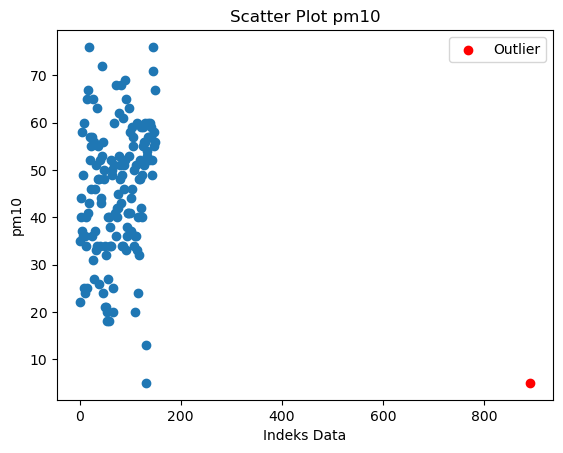

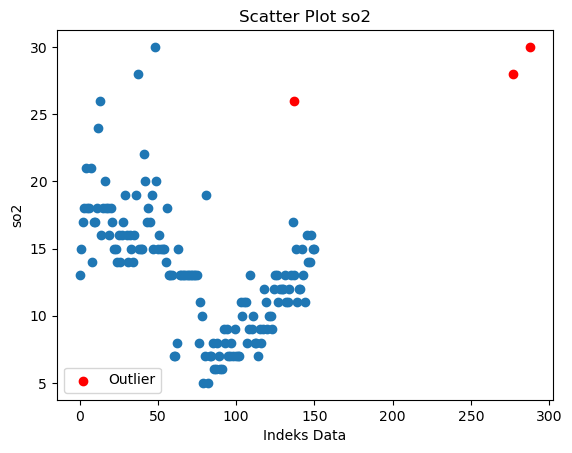

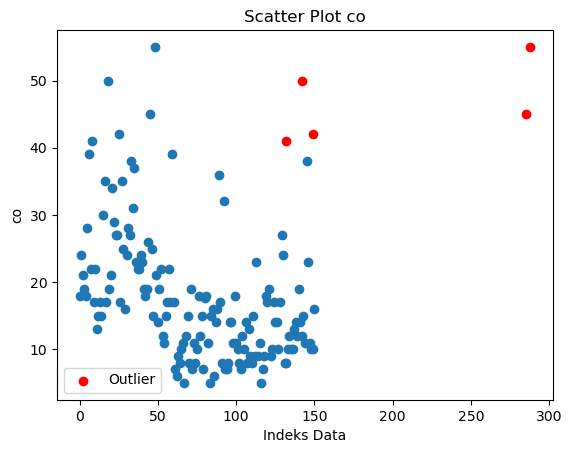

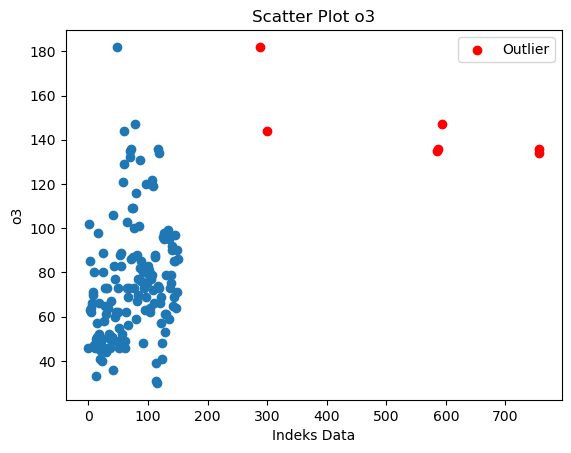

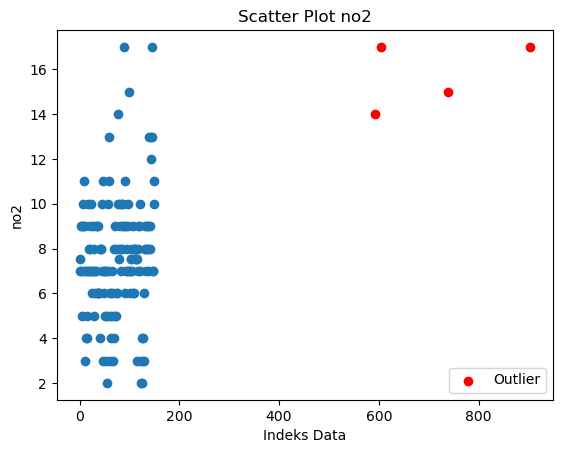

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

col = ['pm10', 'so2', 'co', 'o3', 'no2']

for column in col:
    # Menghitung nilai kuartil pertama (Q1) dan kuartil ketiga (Q3)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Menghitung rentang IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Menentukan batas atas dan batas bawah untuk outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menggambarkan scatter plot
    plt.scatter(range(len(df[column])), df[column])

    # Menentukan indeks outlier
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    outlier_indices = df[outliers].index

    # Menampilkan outlier dengan warna merah pada scatter plot
    plt.scatter(outlier_indices, df.loc[outlier_indices, column], c='red', marker='o', label='Outlier')

    plt.xlabel('Indeks Data')
    plt.ylabel(column)
    plt.title(f'Scatter Plot {column}')
    plt.legend()
    plt.show()


## mengatasi outlier

mengatasi outlier dengan metode winsorizing

In [ ]:
from scipy.stats import mstats

col = ['pm10', 'so2', 'co', 'o3', 'no2']
alpha = 0.05  # Nilai alpha untuk menentukan batas

for column in col:
    winsorized_data = mstats.winsorize(df[column], limits=[alpha, alpha])
    df[column] = winsorized_data


visualisasinya

C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


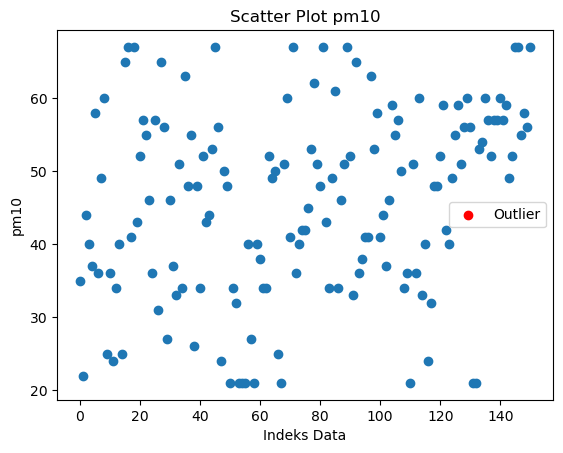

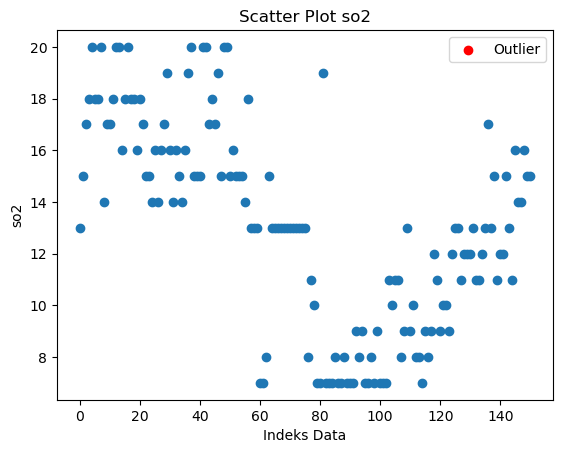

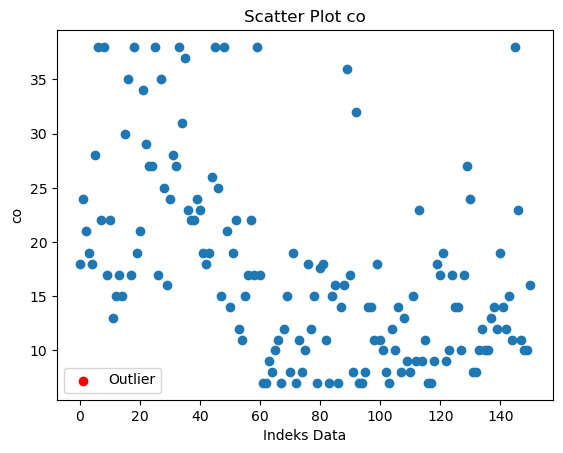

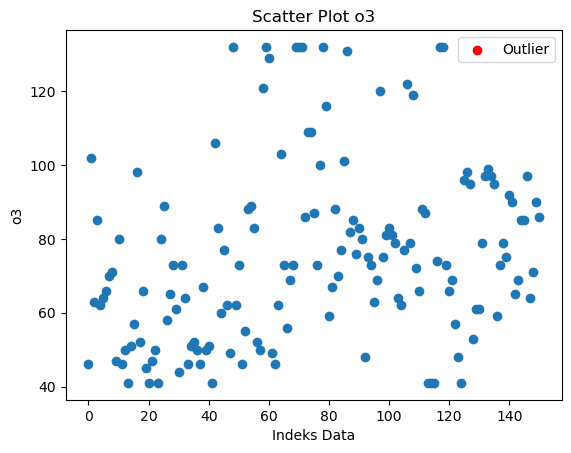

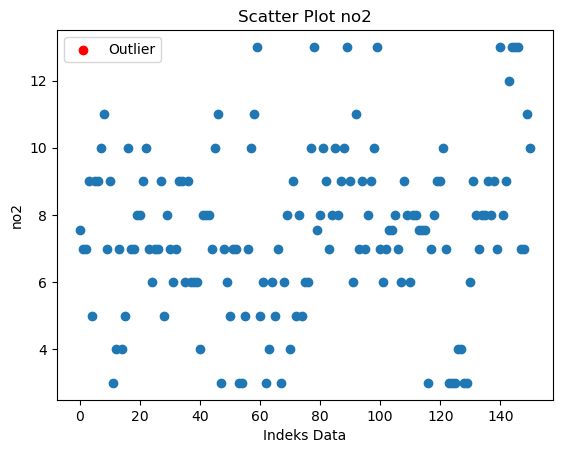

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

col = ['pm10', 'so2', 'co', 'o3', 'no2']

for column in col:
    # Menghitung nilai kuartil pertama (Q1) dan kuartil ketiga (Q3)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Menghitung rentang IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Menentukan batas atas dan batas bawah untuk outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menggambarkan scatter plot
    plt.scatter(range(len(df[column])), df[column])

    # Menentukan indeks outlier
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    outlier_indices = df[outliers].index

    # Menampilkan outlier dengan warna merah pada scatter plot
    plt.scatter(outlier_indices, df.loc[outlier_indices, column], c='red', marker='o', label='Outlier')

    plt.xlabel('Indeks Data')
    plt.ylabel(column)
    plt.title(f'Scatter Plot {column}')
    plt.legend()
    plt.show()


In [ ]:
df

pm10   so2    co     o3        no2  kategori
124  35.0  13.0  18.0   46.0   7.548611         0
125  22.0  15.0  24.0  102.0   7.000000         1
126  44.0  17.0  21.0   63.0   7.000000         2
127  40.0  18.0  19.0   85.0   9.000000         2
128  37.0  20.0  18.0   62.0   5.000000         2
..    ...   ...   ...    ...        ...       ...
905  67.0  14.0  23.0   97.0  13.000000         2
906  55.0  14.0  11.0   64.0   7.000000         2
907  58.0  16.0  10.0   71.0   7.000000         2
908  56.0  15.0  10.0   90.0  11.000000         2
909  67.0  15.0  16.0   86.0  10.000000         2

[151 rows x 6 columns]

## Membagi data menjadi kategori dan numerik

membagi data menjadi numerik dan kategorik

In [ ]:
# Menentukan kolom numerik yang berdistribusi normal dan tidak normal
cat = ['kategori']
num = ['pm10','so2','co','no2','o3']

df[cat] = df[cat].astype(object)

df[num] = df[num].astype(float)

In [ ]:
# Pisahkan kolom numerik dan kategorik
df_num = df[num]
df_cat = df[cat]


In [ ]:
df_num

pm10   so2    co        no2     o3
124  35.0  13.0  18.0   7.548611   46.0
125  22.0  15.0  24.0   7.000000  102.0
126  44.0  17.0  21.0   7.000000   63.0
127  40.0  18.0  19.0   9.000000   85.0
128  37.0  20.0  18.0   5.000000   62.0
..    ...   ...   ...        ...    ...
905  67.0  14.0  23.0  13.000000   97.0
906  55.0  14.0  11.0   7.000000   64.0
907  58.0  16.0  10.0   7.000000   71.0
908  56.0  15.0  10.0  11.000000   90.0
909  67.0  15.0  16.0  10.000000   86.0

[151 rows x 5 columns]

melakukan standarisasi minmax scaller pada data numerik

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi objek MinMaxScaler
scaler = MinMaxScaler()

# Fit dan transform data
scaled_data = scaler.fit_transform(df_num)

# Hasilkan DataFrame hasil normalisasi
normalized_df = pd.DataFrame(scaled_data, columns=df_num.columns)

# Tampilkan dataset yang telah dinormalisasi
print(normalized_df)


         pm10       so2        co       no2        o3
0    0.304348  0.461538  0.354839  0.454861  0.054945
1    0.021739  0.615385  0.548387  0.400000  0.670330
2    0.500000  0.769231  0.451613  0.400000  0.241758
3    0.413043  0.846154  0.387097  0.600000  0.483516
4    0.347826  1.000000  0.354839  0.200000  0.230769
..        ...       ...       ...       ...       ...
146  1.000000  0.538462  0.516129  1.000000  0.615385
147  0.739130  0.538462  0.129032  0.400000  0.252747
148  0.804348  0.692308  0.096774  0.400000  0.329670
149  0.760870  0.615385  0.096774  0.800000  0.538462
150  1.000000  0.615385  0.290323  0.700000  0.494505

[151 rows x 5 columns]


mengatur ulang index pada kolom kategorik

In [ ]:
# Mengatur ulang indeks DataFrame
df_cat = df_cat.reset_index(drop=True)

# Tampilkan dataset dengan indeks yang telah diatur ulang
print(df_cat)


    kategori
0          0
1          1
2          2
3          2
4          2
..       ...
146        2
147        2
148        2
149        2
150        2

[151 rows x 1 columns]


menggabungkan data numerik dan kategorik

In [ ]:
# Menggabungkan data yang telah dinormalisasi dengan kolom kategori
normalized_df = pd.concat([df_cat, normalized_df], axis=1)

normalized_df

kategori      pm10       so2        co       no2        o3
0          0  0.304348  0.461538  0.354839  0.454861  0.054945
1          1  0.021739  0.615385  0.548387  0.400000  0.670330
2          2  0.500000  0.769231  0.451613  0.400000  0.241758
3          2  0.413043  0.846154  0.387097  0.600000  0.483516
4          2  0.347826  1.000000  0.354839  0.200000  0.230769
..       ...       ...       ...       ...       ...       ...
146        2  1.000000  0.538462  0.516129  1.000000  0.615385
147        2  0.739130  0.538462  0.129032  0.400000  0.252747
148        2  0.804348  0.692308  0.096774  0.400000  0.329670
149        2  0.760870  0.615385  0.096774  0.800000  0.538462
150        2  1.000000  0.615385  0.290323  0.700000  0.494505

[151 rows x 6 columns]

In [ ]:
df = normalized_df

In [ ]:
df

kategori      pm10       so2        co       no2        o3
0          0  0.304348  0.461538  0.354839  0.454861  0.054945
1          1  0.021739  0.615385  0.548387  0.400000  0.670330
2          2  0.500000  0.769231  0.451613  0.400000  0.241758
3          2  0.413043  0.846154  0.387097  0.600000  0.483516
4          2  0.347826  1.000000  0.354839  0.200000  0.230769
..       ...       ...       ...       ...       ...       ...
146        2  1.000000  0.538462  0.516129  1.000000  0.615385
147        2  0.739130  0.538462  0.129032  0.400000  0.252747
148        2  0.804348  0.692308  0.096774  0.400000  0.329670
149        2  0.760870  0.615385  0.096774  0.800000  0.538462
150        2  1.000000  0.615385  0.290323  0.700000  0.494505

[151 rows x 6 columns]

In [ ]:
df.dtypes

kategori     object
pm10        float64
so2         float64
co          float64
no2         float64
o3          float64
dtype: object

## melihat ranking kolom paling berpengaruh

melihat ranking kolom menggunakan model decission treeregesor

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

# Pisahkan dataset menjadi fitur dan variabel target
X = df.drop('kategori', axis=1)
y = df['kategori']

# Inisialisasi model Decision Tree
model = DecisionTreeRegressor()

# Fit model ke data
model.fit(X, y)

# Menampilkan feature importance
importance = model.feature_importances_

# Buat DataFrame dari kolom dan importance
feature_importance_df = pd.DataFrame({'Kolom': X.columns, 'Importance': importance})

# Urutkan berdasarkan nilai importance secara menurun
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Tampilkan DataFrame
print(feature_importance_df)


  Kolom  Importance
4    o3    0.695478
0  pm10    0.304522
1   so2    0.000000
2    co    0.000000
3   no2    0.000000


In [ ]:
df

kategori      pm10       so2        co       no2        o3
0          0  0.304348  0.461538  0.354839  0.454861  0.054945
1          1  0.021739  0.615385  0.548387  0.400000  0.670330
2          2  0.500000  0.769231  0.451613  0.400000  0.241758
3          2  0.413043  0.846154  0.387097  0.600000  0.483516
4          2  0.347826  1.000000  0.354839  0.200000  0.230769
..       ...       ...       ...       ...       ...       ...
146        2  1.000000  0.538462  0.516129  1.000000  0.615385
147        2  0.739130  0.538462  0.129032  0.400000  0.252747
148        2  0.804348  0.692308  0.096774  0.400000  0.329670
149        2  0.760870  0.615385  0.096774  0.800000  0.538462
150        2  1.000000  0.615385  0.290323  0.700000  0.494505

[151 rows x 6 columns]

In [ ]:
df['kategori'].value_counts()

2    111
1     21
0     19
Name: kategori, dtype: int64

# Spliting data

medeklarasikan x dan y

In [ ]:
# Mengambil kolom-kolom numerik dari data frame
x = df[['pm10', 'so2', 'o3', 'co', 'no2']]
y = df['kategori']

melakukan pendeklarasian x dan y untuk training dan testing dengan perbandingan 20:80

In [ ]:
import numpy as np

# Menentukan ukuran data pengujian
test_size = 0.2

# Mengacak indeks data
indeks = np.arange(len(x))
np.random.shuffle(indeks)

# Menghitung jumlah data untuk set pengujian
num_test = int(test_size * len(x))

# Memisahkan data menjadi set pelatihan dan set pengujian
x_train = np.take(x, indeks[num_test:], axis=0)
y_train = np.take(y, indeks[num_test:], axis=0)
x_test = np.take(x, indeks[:num_test], axis=0)
y_test = np.take(y, indeks[:num_test], axis=0)



# Pemodelan & evaluasi performa

## knn

melakukan pemodelan knn dengan scratch atau tidak menggunakan library sklearn

In [ ]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors

    def fit(self, x, y):
        self.x_train = x
        self.y_train = y

    def predict(self, X):
        y_pred = []
        for sample in X.values:
            distances = [euclidean_distance(sample, x) for x in self.x_train.values]
            nearest_indices = np.argsort(distances)[:self.n_neighbors]
            nearest_labels = self.y_train.iloc[nearest_indices]
            unique_labels, label_counts = np.unique(nearest_labels, return_counts=True)
            y_pred.append(unique_labels[np.argmax(label_counts)])
        return np.array(y_pred)


melihat nilai k yang terbaik untuk digunakan pada pemodelan kali ini dan diketahui k=3 adalah yg terbaik

In [ ]:
k_values = [1, 3, 5, 7, 9]
accuracies = []

for k in k_values:
    knn = KNN(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy = np.mean(y_pred == y_test)
    accuracies.append(accuracy)

for k, accuracy in zip(k_values, accuracies):
    print(f"K = {k}, Akurasi = {accuracy}")


K = 1, Akurasi = 0.8666666666666667
K = 3, Akurasi = 0.9333333333333333
K = 5, Akurasi = 0.7666666666666667
K = 7, Akurasi = 0.7666666666666667
K = 9, Akurasi = 0.8333333333333334


melakukan pendeklarasian knn

In [ ]:
# Penggunaan
knn = KNN(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

meunculkan akurasi dari klasifikasi knn

In [ ]:
def calculate_accuracy(y_true, y_pred):
    correct = 0
    total = len(y_true)
    for true, pred in zip(y_true, y_pred):
        if true == pred:
            correct += 1
    accuracy = correct / total
    return accuracy

def calculate_precision(y_true, y_pred, target_class):
    true_positive = 0
    predicted_positive = 0
    for true, pred in zip(y_true, y_pred):
        if pred == target_class:
            predicted_positive += 1
            if true == pred:
                true_positive += 1
    if predicted_positive == 0:
        precision = 0
    else:
        precision = true_positive / predicted_positive
    return precision

def calculate_recall(y_true, y_pred, target_class):
    true_positive = 0
    actual_positive = 0
    for true, pred in zip(y_true, y_pred):
        if true == target_class:
            actual_positive += 1
            if true == pred:
                true_positive += 1
    if actual_positive == 0:
        recall = 0
    else:
        recall = true_positive / actual_positive
    return recall

def calculate_f1_score(precision, recall):
    if precision + recall == 0:
        f1_score = 0
    else:
        f1_score = 2 * (precision * recall) / (precision + recall)
    return f1_score

def calculate_confusion_matrix(y_true, y_pred):
    unique_classes = list(set(y_true + y_pred))
    num_classes = len(unique_classes)
    confusion_matrix = [[0] * num_classes for _ in range(num_classes)]
    class_index = {c: i for i, c in enumerate(unique_classes)}
    for true, pred in zip(y_true, y_pred):
        true_index = class_index[true]
        pred_index = class_index[pred]
        confusion_matrix[true_index][pred_index] += 1
    return confusion_matrix

def print_classification_report(y_true, y_pred):
    unique_classes = list(set(y_true + y_pred))
    for target_class in unique_classes:
        precision = calculate_precision(y_true, y_pred, target_class)
        recall = calculate_recall(y_true, y_pred, target_class)
        f1_score = calculate_f1_score(precision, recall)
        print(f"Class: {target_class}")
        print(f"Precision: {precision:.2f}")
        print(f"Recall: {recall:.2f}")
        print(f"F1-score: {f1_score:.2f}")
        print()

    accuracy = calculate_accuracy(y_true, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

print_classification_report(y_test, y_pred)


Class: 0
Precision: 0.75
Recall: 1.00
F1-score: 0.86

Class: 2
Precision: 0.96
Recall: 0.96
F1-score: 0.96

Class: 3
Precision: 0.00
Recall: 0.00
F1-score: 0.00

Class: 4
Precision: 0.00
Recall: 0.00
F1-score: 0.00

Accuracy: 0.93


melakukan pembandingan pada data training dan testing

In [ ]:
# Prediksi pada data pelatihan
y_pred_train = knn.predict(x_train)
accuracy_train = calculate_accuracy(y_train, y_pred_train)

# Prediksi pada data testing
y_pred_test = knn.predict(x_test)
accuracy_test = calculate_accuracy(y_test, y_pred_test)

# Persentase performa pada data pelatihan dan data testing
percentage_train = accuracy_train * 100
percentage_test = accuracy_test * 100

print("Performa pada data pelatihan:", percentage_train, "%")
print("Performa pada data testing:", percentage_test, "%")


Performa pada data pelatihan: 93.38842975206612 %
Performa pada data testing: 93.33333333333333 %


melihat performa knn dengan cross validation

In [ ]:
import numpy as np

# Inisialisasi jumlah lipatan dan ukuran data
k = 5
n = len(x)

# Mengacak indeks data
indices = np.arange(n)
np.random.shuffle(indices)

# Menghitung ukuran lipatan
fold_size = n // k

# Inisialisasi array untuk menyimpan skor akurasi setiap lipatan
scores = []

# Melakukan validasi silang
for i in range(k):
    # Mengatur indeks untuk set pelatihan dan set pengujian
    test_indices = indices[i * fold_size: (i + 1) * fold_size]
    train_indices = np.concatenate((indices[:i * fold_size], indices[(i + 1) * fold_size:]))

    # Memisahkan data menjadi set pelatihan dan set pengujian
    x_train, x_test = x.iloc[train_indices], x.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

    # Melakukan pelatihan model
    knn.fit(x_train, y_train)

    # Melakukan prediksi pada set pengujian
    y_pred = knn.predict(x_test)

    # Menghitung akurasi
    accuracy = calculate_accuracy(y_test, y_pred)
    scores.append(accuracy)

    # Cetak nilai akurasi pada setiap lipatan
    print(f"Fold-{i+1}: {accuracy}")

# Menghitung rata-rata akurasi
mean_accuracy = np.mean(scores)
print("Rata-rata Akurasi: ", mean_accuracy)


Fold-1: 0.8666666666666667
Fold-2: 0.7666666666666667
Fold-3: 0.8
Fold-4: 0.8666666666666667
Fold-5: 0.8666666666666667
Rata-rata Akurasi:  0.8333333333333334


## nn

In [ ]:
y_train = y_train.astype(int)

In [ ]:
df

kategori      pm10       so2        co       no2        o3
0          0  0.304348  0.461538  0.354839  0.454861  0.054945
1          1  0.021739  0.615385  0.548387  0.400000  0.670330
2          2  0.500000  0.769231  0.451613  0.400000  0.241758
3          2  0.413043  0.846154  0.387097  0.600000  0.483516
4          2  0.347826  1.000000  0.354839  0.200000  0.230769
..       ...       ...       ...       ...       ...       ...
146        2  1.000000  0.538462  0.516129  1.000000  0.615385
147        2  0.739130  0.538462  0.129032  0.400000  0.252747
148        2  0.804348  0.692308  0.096774  0.400000  0.329670
149        2  0.760870  0.615385  0.096774  0.800000  0.538462
150        2  1.000000  0.615385  0.290323  0.700000  0.494505

[151 rows x 6 columns]

In [ ]:
import numpy as np

class MLPClassifier:
    def __init__(self, hidden_layer_sizes, learning_rate, max_iter):
        self.hidden_layer_sizes = hidden_layer_sizes
        self.learning_rate = learning_rate
        self.max_iter = max_iter

    def fit(self, X, y):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))

        # Inisialisasi bobot dan bias
        self.weights, self.biases = self.initialize_weights(n_features, n_classes)

        # Training
        for _ in range(self.max_iter):
            # Forward propagation
            z, a = self.forward_propagation(X)

            # Backpropagation
            delta = self.backward_propagation(X, y, z, a)

            # Perbarui bobot dan bias
            self.update_weights(a, delta)

    def initialize_weights(self, n_features, n_classes):
        weights = []
        biases = []

        # Inisialisasi bobot untuk lapisan tersembunyi
        n_hidden_layers = len(self.hidden_layer_sizes)
        for i in range(n_hidden_layers):
            if i == 0:
                # Inisialisasi bobot untuk lapisan tersembunyi pertama
                weight = np.random.randn(n_features, self.hidden_layer_sizes[i])
            else:
                # Inisialisasi bobot untuk lapisan tersembunyi selanjutnya
                weight = np.random.randn(self.hidden_layer_sizes[i-1], self.hidden_layer_sizes[i])
            bias = np.zeros((1, self.hidden_layer_sizes[i]))

            weights.append(weight)
            biases.append(bias)

        # Inisialisasi bobot untuk lapisan output
        weight = np.random.randn(self.hidden_layer_sizes[-1], n_classes)
        bias = np.zeros((1, n_classes))

        weights.append(weight)
        biases.append(bias)

        return weights, biases

    def forward_propagation(self, X):
        a = [X]
        z = []

        # Lapisan tersembunyi
        for i in range(len(self.weights)):
            z_i = np.dot(a[i], self.weights[i]) + self.biases[i]
            a_i = self.sigmoid(z_i)

            z.append(z_i)
            a.append(a_i)

        return z, a

    def backward_propagation(self, X, y, z, a):
        n_samples = X.shape[0]
        n_layers = len(self.weights)
        delta = [None] * n_layers

        # Hitung delta di lapisan output
        delta_output = self.softmax_derivative(a[-1], y)
        delta[-1] = delta_output

        # Hitung delta di lapisan tersembunyi
        for i in reversed(range(n_layers-1)):
            delta_i = np.dot(delta[i+1], self.weights[i+1].T) * self.sigmoid_derivative(z[i])
            delta[i] = delta_i

        return delta

    def update_weights(self, a, delta):
        n_samples = a[0].shape[0]
        n_layers = len(self.weights)

        # Perbarui bobot dan bias di lapisan tersembunyi dan lapisan output
        for i in range(n_layers):
            grad_weights = np.dot(a[i].T, delta[i]) / n_samples
            grad_biases = np.mean(delta[i], axis=0)

            self.weights[i] -= self.learning_rate * grad_weights
            self.biases[i] -= self.learning_rate * grad_biases

    def predict(self, X):
        z, a = self.forward_propagation(X)
        y_pred = np.argmax(a[-1], axis=1)
        return y_pred

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    def softmax(self, x):
        exps = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exps / np.sum(exps, axis=1, keepdims=True)

    def softmax_derivative(self, x, y):
        n_samples = x.shape[0]
        p = self.softmax(x)
        p[range(n_samples), y] -= 1
        return p / n_samples


In [ ]:
nn = MLPClassifier(hidden_layer_sizes=[3], learning_rate=0.1, max_iter=100)

In [ ]:
nn.fit(x_train, y_train)
y_pred = nn.predict(x_test)

In [ ]:
def calculate_accuracy(y_true, y_pred):
    correct = 0
    total = len(y_true)
    for true, pred in zip(y_true, y_pred):
        if true == pred:
            correct += 1
    accuracy = correct / total
    return accuracy

def calculate_precision(y_true, y_pred, target_class):
    true_positive = 0
    predicted_positive = 0
    for true, pred in zip(y_true, y_pred):
        if pred == target_class:
            predicted_positive += 1
            if true == pred:
                true_positive += 1
    if predicted_positive == 0:
        precision = 0
    else:
        precision = true_positive / predicted_positive
    return precision

def calculate_recall(y_true, y_pred, target_class):
    true_positive = 0
    actual_positive = 0
    for true, pred in zip(y_true, y_pred):
        if true == target_class:
            actual_positive += 1
            if true == pred:
                true_positive += 1
    if actual_positive == 0:
        recall = 0
    else:
        recall = true_positive / actual_positive
    return recall

def calculate_f1_score(precision, recall):
    if precision + recall == 0:
        f1_score = 0
    else:
        f1_score = 2 * (precision * recall) / (precision + recall)
    return f1_score

def calculate_confusion_matrix(y_true, y_pred):
    unique_classes = list(set(y_true + y_pred))
    num_classes = len(unique_classes)
    confusion_matrix = [[0] * num_classes for _ in range(num_classes)]
    class_index = {c: i for i, c in enumerate(unique_classes)}
    for true, pred in zip(y_true, y_pred):
        true_index = class_index[true]
        pred_index = class_index[pred]
        confusion_matrix[true_index][pred_index] += 1
    return confusion_matrix

def print_classification_report(y_true, y_pred):
    unique_classes = list(set(y_true + y_pred))
    for target_class in unique_classes:
        precision = calculate_precision(y_true, y_pred, target_class)
        recall = calculate_recall(y_true, y_pred, target_class)
        f1_score = calculate_f1_score(precision, recall)
        print(f"Class: {target_class}")
        print(f"Precision: {precision:.2f}")
        print(f"Recall: {recall:.2f}")
        print(f"F1-score: {f1_score:.2f}")
        print()

    accuracy = calculate_accuracy(y_true, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

print_classification_report(y_test, y_pred)


Class: 2
Precision: 0.77
Recall: 1.00
F1-score: 0.87

Class: 3
Precision: 0.00
Recall: 0.00
F1-score: 0.00

Class: 4
Precision: 0.00
Recall: 0.00
F1-score: 0.00

Accuracy: 0.77


In [ ]:
# Prediksi pada data pelatihan
y_pred_train = nn.predict(x_train)
accuracy_train = calculate_accuracy(y_train, y_pred_train)

# Prediksi pada data testing
y_pred_test = nn.predict(x_test)
accuracy_test = calculate_accuracy(y_test, y_pred_test)

# Persentase performa pada data pelatihan dan data testing
percentage_train = accuracy_train * 100
percentage_test = accuracy_test * 100

print("Performa pada data pelatihan:", percentage_train, "%")
print("Performa pada data testing:", percentage_test, "%")


Performa pada data pelatihan: 72.72727272727273 %
Performa pada data testing: 76.66666666666667 %
